<a href="https://colab.research.google.com/github/ashfaknawshad/ml-roadmap/blob/main/04_deep_learning/neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Import Libraries

In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# TensorFlow and Keras for building neural networks
!pip install tensorflow --upgrade
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Train-test split
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import classification_report, confusion_matrix


### Step 2: Load Dataset

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

# One-hot encode labels for neural network
y = to_categorical(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 3: Build Neural Network

In [ ]:
# Initialize model
model = Sequential()

# Input layer + first hidden layer
model.add(Dense(8, input_shape=(4,), activation='relu'))

# Second hidden layer
model.add(Dense(6, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))  # 3 classes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: COmpile Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Step 5: Train Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=5,
    verbose=1
)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3045 - loss: 1.3495 - val_accuracy: 0.4762 - val_loss: 1.0033
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4223 - loss: 1.0791 - val_accuracy: 0.4762 - val_loss: 0.9608
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2690 - loss: 1.1822 - val_accuracy: 0.4762 - val_loss: 0.9365
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4458 - loss: 0.9495 - val_accuracy: 0.4762 - val_loss: 0.9250
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3397 - loss: 1.0166 - val_accuracy: 0.4762 - val_loss: 0.9185
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2554 - loss: 1.0610 - val_accuracy: 0.4762 - val_loss: 0.9149
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3304 - loss: 0.9926 - val_accuracy: 0.4762 - val_loss: 0.9116
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3620 - loss: 0.9540 - val_accuracy: 0.

### Step 6: Evaluate Model

In [ ]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Metrics
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred_classes))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.1920
Test Accuracy: 1.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


### Step 7: Visualize Training Accuracy/Loss (Optional)

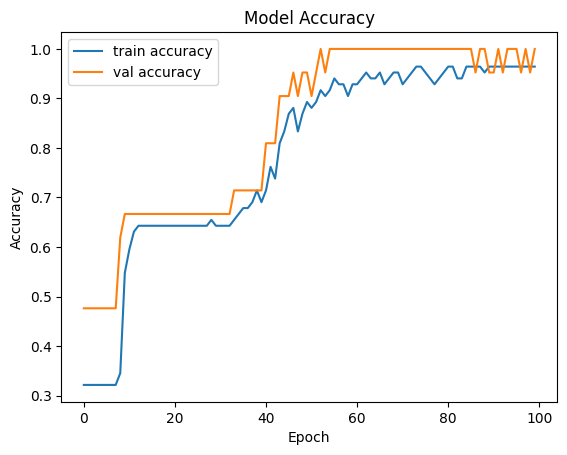

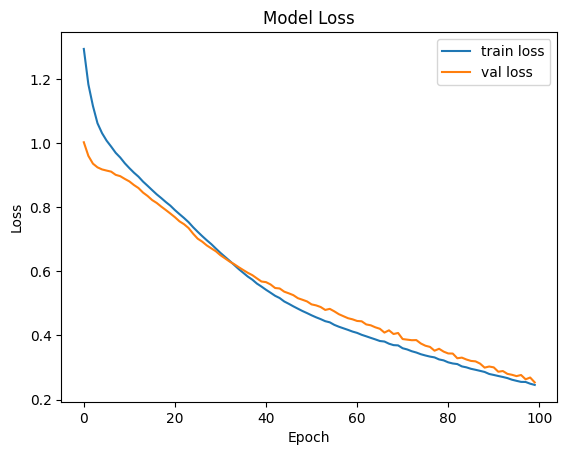

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()